# demo05_poly.ipynb    多项式回归

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

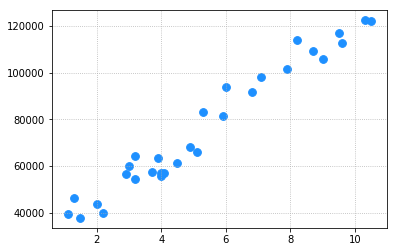

In [31]:
# 加载数据集  
data = pd.read_csv('Salary_Data.csv')
x, y = data['YearsExperience'], data['Salary']
plt.grid(linestyle=':')
plt.scatter(x, y, s=60, color='dodgerblue', label='Samples')

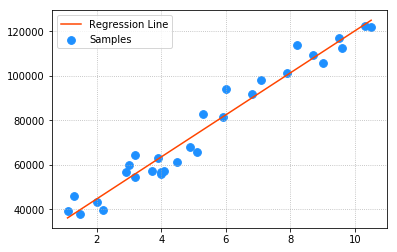

In [32]:
# 基于sklearn提供的API，训练线性回归模型
import sklearn.linear_model as lm
train_x, train_y = pd.DataFrame(x), y
model = lm.LinearRegression()
model.fit(train_x, train_y)
# 针对所有训练样本，执行预测操作， 绘制回归线
pred_train_y = model.predict(train_x)

# 可视化
plt.grid(linestyle=':')
plt.scatter(x, y, s=60, color='dodgerblue', label='Samples')
plt.plot(x, pred_train_y, color='orangered', label='Regression Line')
plt.legend()

# 找到一组测试样本数据，输出评估指标结果

In [33]:
test_x, test_y = train_x.iloc[::4], train_y[::4]
pred_test_y = model.predict(test_x) 
# 评估误差
import sklearn.metrics as sm
print(sm.mean_absolute_error(test_y, pred_test_y))
print(sm.mean_squared_error(test_y, pred_test_y))
print(sm.median_absolute_error(test_y, pred_test_y))
print(sm.r2_score(test_y, pred_test_y))

4587.366522327392
29784216.419621646
4895.445366109852
0.964548495965924


## 多项式回归模型

In [51]:
import sklearn.pipeline as pl
import sklearn.preprocessing as sp

model = pl.make_pipeline(sp.PolynomialFeatures(4), lm.Ridge())
model.fit(train_x, train_y)  # 对train_x做多项式特征扩展，然后训练线性回归模型
pred_test_y = model.predict(test_x)
# 评估
print(sm.r2_score(test_y, pred_test_y))

0.9652770569548464


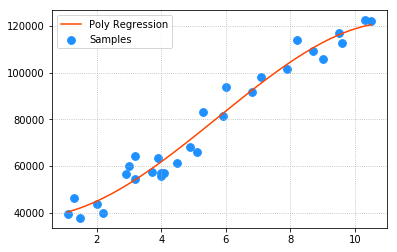

In [52]:
# 可视化
plt.grid(linestyle=':')
plt.scatter(x, y, s=60, color='dodgerblue', label='Samples')
# 构造200个样本点，预测得到200个输出，绘制多项式模型图像
xs = np.linspace(train_x.min(), train_x.max(), 200)
ys = model.predict(xs.reshape(-1, 1))
plt.plot(xs, ys, color='orangered', label='Poly Regression')
plt.legend()